# Purpose

- Create and Upload the .csv file to the DB, and test an interaction with the llama-index

In [8]:
from dotenv import load_dotenv
import os

load_dotenv()

OPENAI_API_KEY   = os.getenv("OPENAI_API_KEY")
MYSQL_USER       = os.getenv("MYSQL_USER")
MYSQL_PASSWORD   = os.getenv("MYSQL_PASSWORD")
MYSQL_HOST       = os.getenv("MYSQL_HOST", "localhost")
MYSQL_PORT       = os.getenv("MYSQL_PORT", "3306")
MYSQL_DATABASE   = os.getenv("MYSQL_DATABASE")

# Verificações rápidas
assert OPENAI_API_KEY, "⚠️ Defina OPENAI_API_KEY no .env"
assert MYSQL_USER and MYSQL_PASSWORD and MYSQL_DATABASE, \
       "⚠️ Defina MYSQL_USER, MYSQL_PASSWORD e MYSQL_DATABASE no .env"

print("🔐 Variáveis de ambiente carregadas com sucesso!")

🔐 Variáveis de ambiente carregadas com sucesso!


# Connection to DB

In [9]:
import pandas as pd
from sqlalchemy import create_engine

connection_string = (
    f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}"
    f"@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}"
)

engine = create_engine(connection_string)

csv_path = "../../data/ready/train.csv"
df_train = pd.read_csv(csv_path)

df_train.to_sql(
    name="train",
    con=engine,
    if_exists="replace",
    index=False,          
    dtype=None           
)

print(f"DataFrame com {len(df_train)} linhas gravado na tabela MySQL `train`.")

DataFrame com 120750 linhas gravado na tabela MySQL `train`.


In [10]:
from llama_index.core.query_engine import NLSQLTableQueryEngine
from llama_index.core import SQLDatabase

# Getting connection and engine working

In [11]:
sql_db = SQLDatabase(engine=engine)
query_engine = NLSQLTableQueryEngine(sql_database=sql_db, verbose=True)

# Testing

In [12]:
resposta = query_engine.query("Qual a 'idade' média?")
print("🤖 Resposta:", resposta)

> Table Info: Table 'train' has columns: REF_DATE (TEXT), Inadiplencia (TEXT), Sexo (TEXT), IDADE (BIGINT), Obito (TEXT), UF (TEXT), Classe Social (TEXT), .
> Table desc str: Table 'train' has columns: REF_DATE (TEXT), Inadiplencia (TEXT), Sexo (TEXT), IDADE (BIGINT), Obito (TEXT), UF (TEXT), Classe Social (TEXT), .
> Predicted SQL query: SELECT AVG(IDADE) AS Media_Idade FROM train
🤖 Resposta: A idade média é de aproximadamente 41.88 anos.


In [13]:
resposta = query_engine.query("Quais as quantidades de inadinplentes e adimplentes?")
print("🤖 Resposta:", resposta)

> Table Info: Table 'train' has columns: REF_DATE (TEXT), Inadiplencia (TEXT), Sexo (TEXT), IDADE (BIGINT), Obito (TEXT), UF (TEXT), Classe Social (TEXT), .
> Table desc str: Table 'train' has columns: REF_DATE (TEXT), Inadiplencia (TEXT), Sexo (TEXT), IDADE (BIGINT), Obito (TEXT), UF (TEXT), Classe Social (TEXT), .
> Predicted SQL query: SELECT Inadiplencia, COUNT(*) AS Quantidade FROM train GROUP BY Inadiplencia
🤖 Resposta: Existem 91.163 adimplentes e 29.587 inadimplentes.


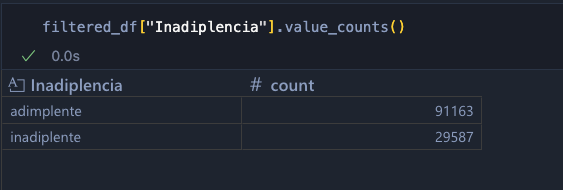